In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns
sns.set(style="darkgrid")

import sys
sys.path.insert(1, '../../lab_1/')

PATH_TO_DATA = '../../lab_1/data/'

from functions import (get_df_with_return, 
                       get_df_with_mean_std_return,
                       get_portfolio_risk,
                       minimize_portfolio,
                       calculate_efficient_frontier,
                       plot_efficient_frontier)

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
history_data = pd.read_csv(PATH_TO_DATA + 'prepared_data.csv', encoding='utf-16')
stock_characteristics = pd.read_csv(PATH_TO_DATA + 'data_characteristics.csv', encoding='utf-16').set_index('SECID')
index_data = pd.read_csv(PATH_TO_DATA + 'index_data.csv', encoding='utf-16')

In [82]:
index_data_with_return = get_df_with_return(index_data, price_name='CLOSE', first_day_value=0.0)
index_data_characteristics = get_df_with_mean_std_return(index_data_with_return[['SECID', 'RETURN']].copy()).groupby('SECID').first().reset_index().drop(columns=['RETURN'])
index_return = index_data_with_return.RETURN
index_mean_return = index_data_characteristics.MEAN_RETURN[0]
index_std_return = index_data_characteristics.STD_RETURN[0]

In [ ]:
stock_characteristics['RISK_FEE'] = stock_characteristics.MEAN_RETURN / stock_characteristics.STD_RETURN

dates = sorted(history_data.TRADEDATE.unique())
tickers = history_data.SECID.unique()

stock_return  = pd.DataFrame(columns = tickers, index = dates)

for ticker in tickers:
    df = pd.DataFrame(history_data[history_data.SECID == ticker]).set_index("TRADEDATE")
    stock_return[ticker] = df.RETURN

In [6]:
top_10_by_risk_fee = stock_characteristics.sort_values(by='RISK_FEE', ascending=False).head(10).index
top_10_by_risk_fee_characteristics = stock_characteristics.filter(top_10_by_risk_fee, axis=0)

top_50_by_risk_fee = stock_characteristics.sort_values(by='RISK_FEE', ascending=False).head(50).index
top_50_by_risk_fee_characteristics = stock_characteristics.filter(top_50_by_risk_fee, axis=0)

Выберем 10 лучших активов по плате за риск (коэффициент Шарпа с нулевой доходностью безрискового портфеля)

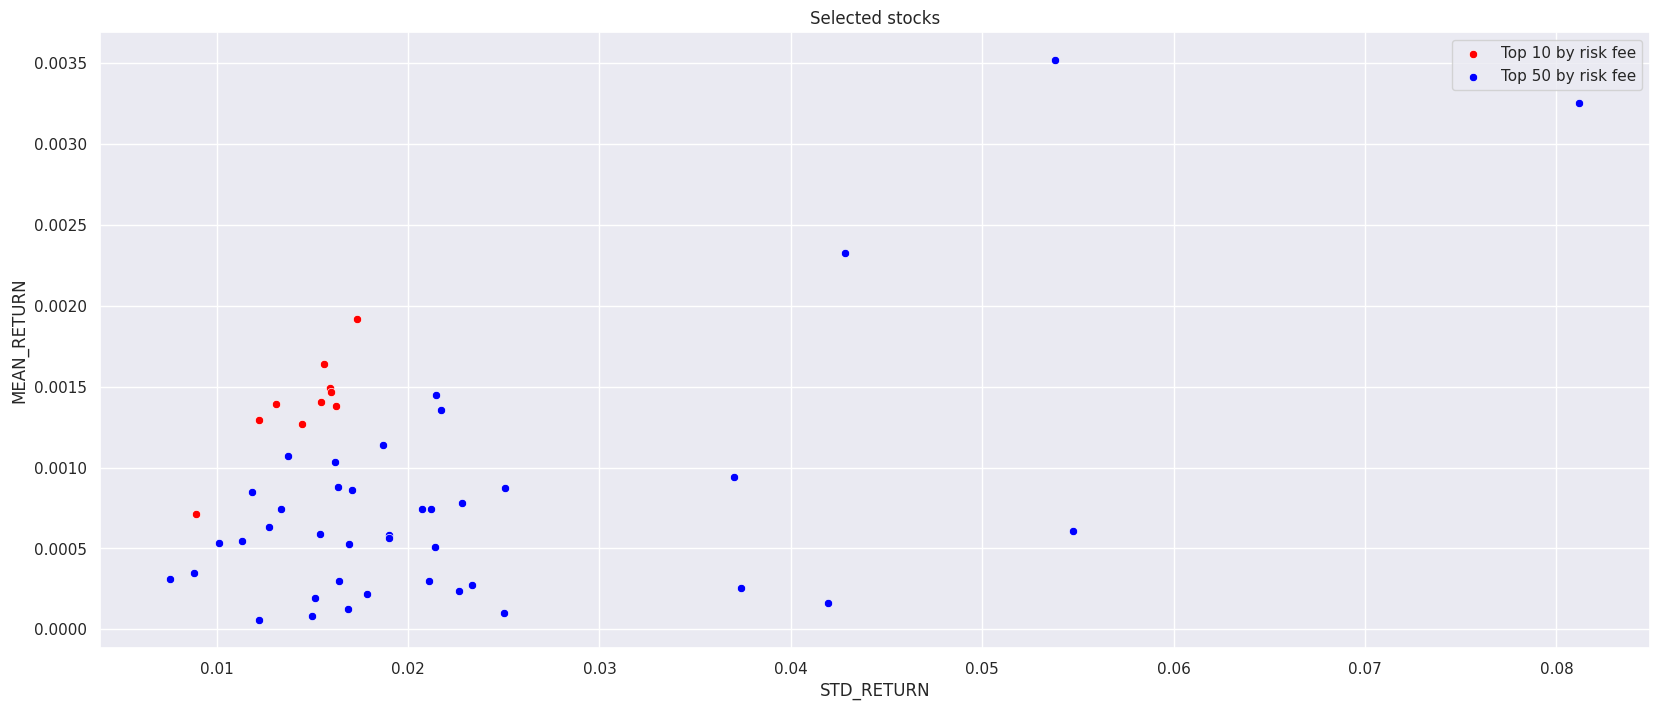

In [43]:
plt.figure(figsize=(20,8))

sns.scatterplot(x=top_10_by_risk_fee_characteristics.STD_RETURN,
        y=top_10_by_risk_fee_characteristics.MEAN_RETURN, color='red', label='Top 10 by risk fee')

sns.scatterplot(x=top_50_by_risk_fee_characteristics[10:].STD_RETURN,
        y=top_50_by_risk_fee_characteristics[10:].MEAN_RETURN, color='blue', label='Top 50 by risk fee')
plt.legend()
plt.title('Selected stocks')
plt.show()

## Топ-10 активов, короткие продажи разрешены

In [79]:
min_risk_portfolio_std, min_risk_portfolio_return, portfolio_stds, portfolio_returns = calculate_efficient_frontier(top_10_by_risk_fee_characteristics,
                                                                                                                    stock_return[top_10_by_risk_fee].cov(),
                                                                                                                    short_sales=True)

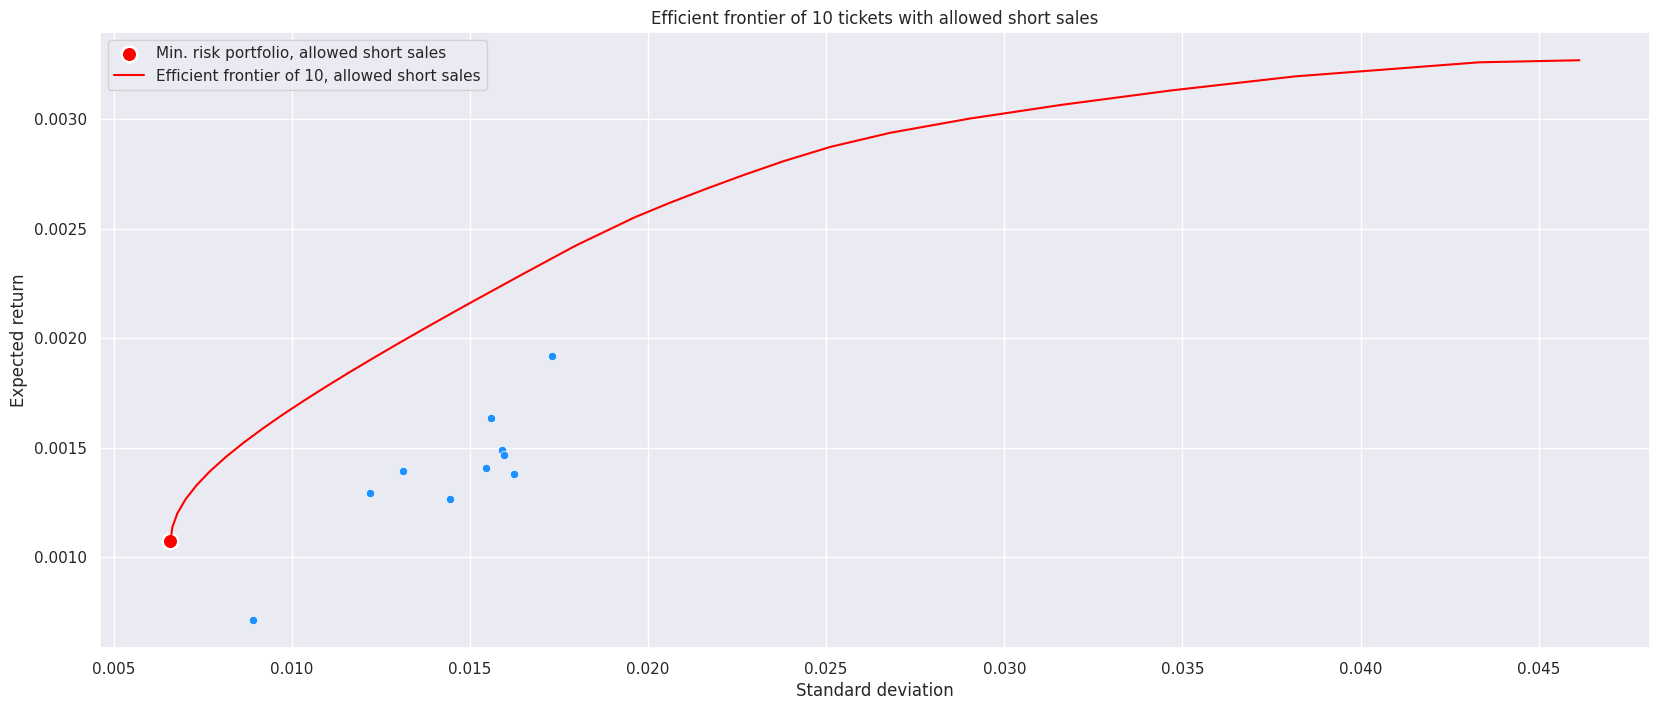

In [45]:
plt.figure(figsize=(20,8))
plot_efficient_frontier(top_10_by_risk_fee_characteristics, min_risk_portfolio_std, min_risk_portfolio_return, portfolio_stds, portfolio_returns, short_sales=True)
plt.title('Efficient frontier of 10 tickets with allowed short sales')
plt.show()

## Топ-10 активов, короткие продажи запрещены

In [14]:
min_risk_portfolio_std_with_short, 
min_risk_portfolio_return_with_short, 
portfolio_stds_with_short, 
portfolio_returns_with_short = calculate_efficient_frontier(top_10_by_risk_fee_characteristics,
                                                            stock_return[top_10_by_risk_fee].cov(),
                                                            short_sales=False)

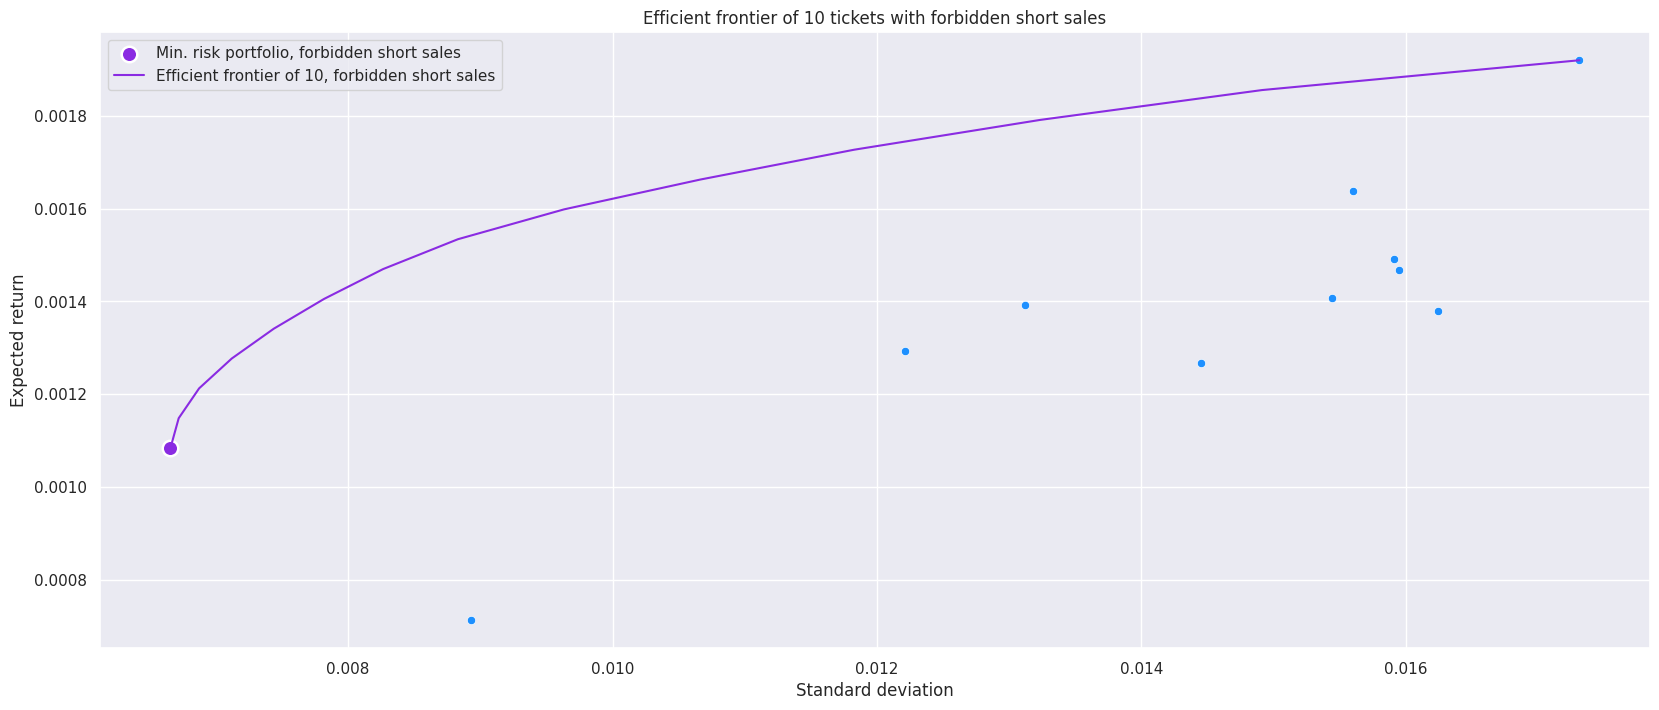

In [44]:
plt.figure(figsize=(20,8))
plot_efficient_frontier(top_10_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_with_short, 
                        min_risk_portfolio_return_with_short, 
                        portfolio_stds_with_short, 
                        portfolio_returns_with_short, 
                        short_sales=False, 
                        color='blueviolet')
plt.title('Efficient frontier of 10 tickets with forbidden short sales')
plt.show()

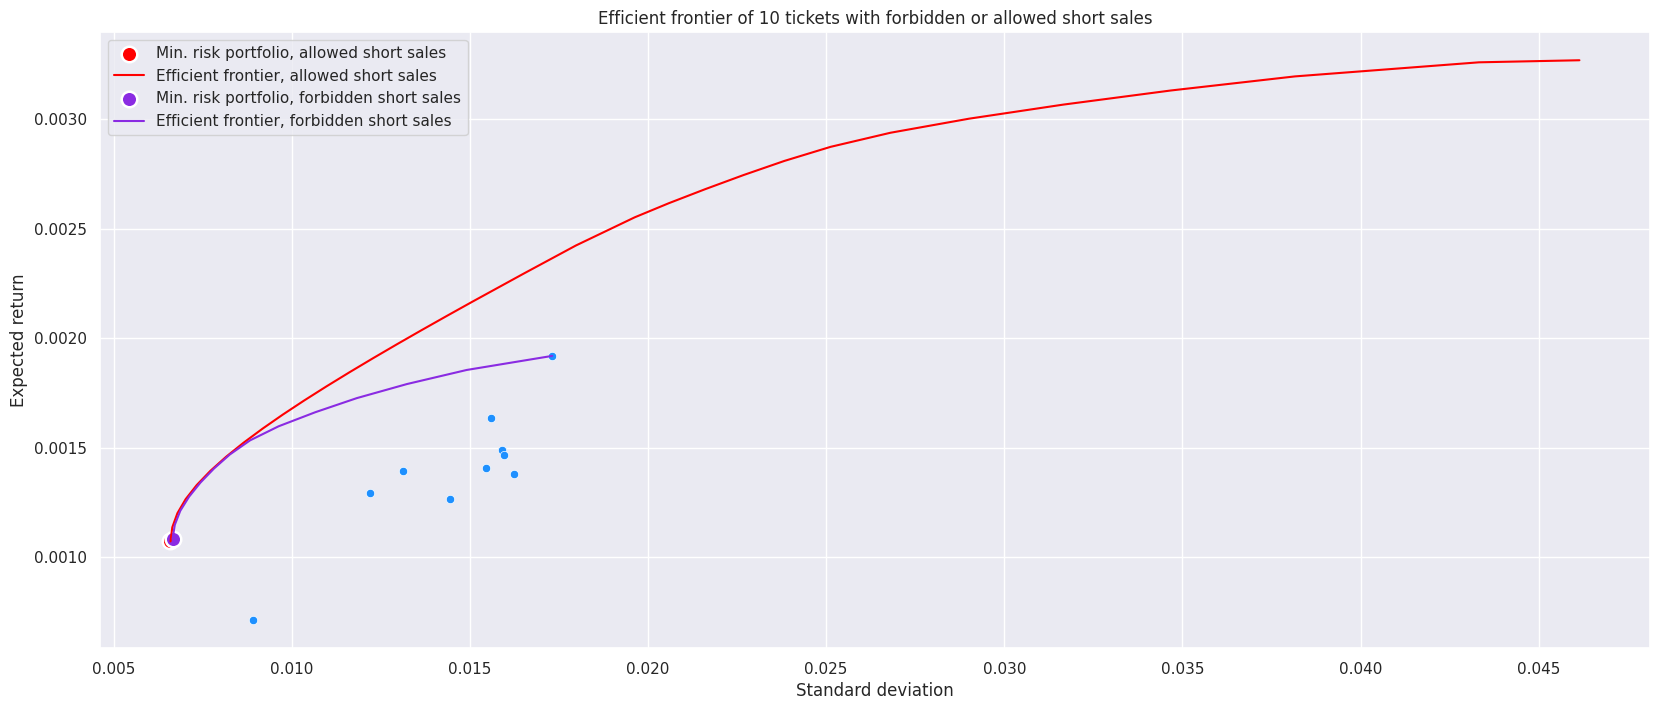

In [20]:
plt.figure(figsize=(20,8))

plot_efficient_frontier(stock_characteristics.filter(top_10_by_risk_fee, axis=0), 
                        min_risk_portfolio_std,
                        min_risk_portfolio_return, 
                        portfolio_stds, 
                        portfolio_returns, 
                        short_sales=True )

plot_efficient_frontier(stock_characteristics.filter(top_10_by_risk_fee, axis=0), 
                        min_risk_portfolio_std_with_short, 
                        min_risk_portfolio_return_with_short, 
                        portfolio_stds_with_short, 
                        portfolio_returns_with_short, 
                        short_sales=False, 
                        color='blueviolet')

plt.title('Efficient frontier of 10 tickets with forbidden or allowed short sales')
plt.show()

## Топ-50 активов, короткие продажи разрешены

In [16]:
min_risk_portfolio_std_50, min_risk_portfolio_return_50, portfolio_stds_50, portfolio_returns_50 = calculate_efficient_frontier(top_50_by_risk_fee_characteristics,
                                                                                                                    stock_return[top_50_by_risk_fee].cov(),
                                                                                                                    short_sales=True)

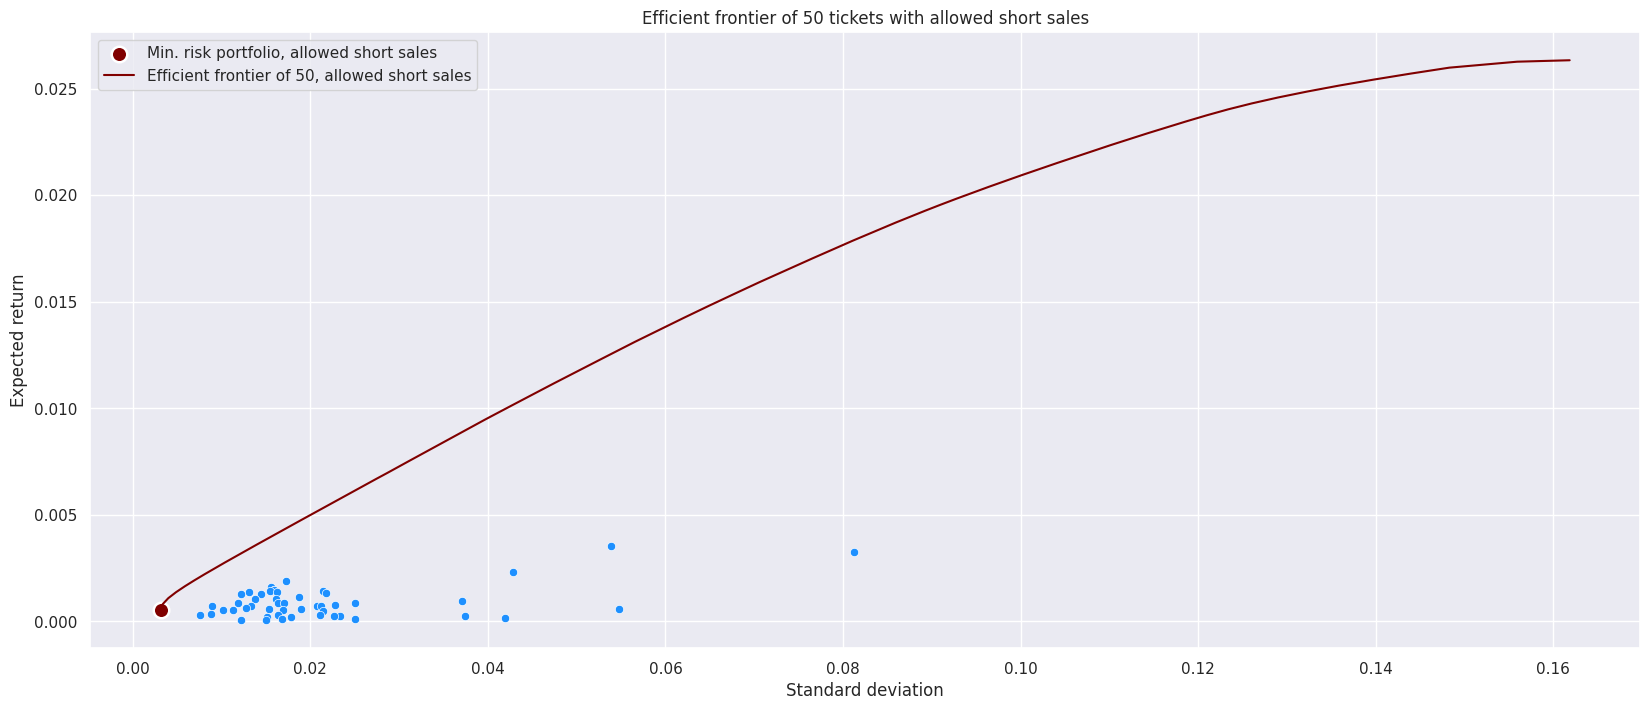

In [51]:
plt.figure(figsize=(20,8))
plot_efficient_frontier(top_50_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_50, 
                        min_risk_portfolio_return_50, 
                        portfolio_stds_50, 
                        portfolio_returns_50, 
                        short_sales=True, 
                        color='maroon', 
                        num=50)
plt.title('Efficient frontier of 50 tickets with allowed short sales')
plt.show()

## Топ-50 активов, короткие продажи запрещены

In [18]:
min_risk_portfolio_std_with_short_50, 
min_risk_portfolio_return_with_short_50, 
portfolio_stds_with_short_50, 
portfolio_returns_with_short_50 = calculate_efficient_frontier(top_50_by_risk_fee_characteristics,
                                                                stock_return[top_50_by_risk_fee].cov(),
                                                                short_sales=False)

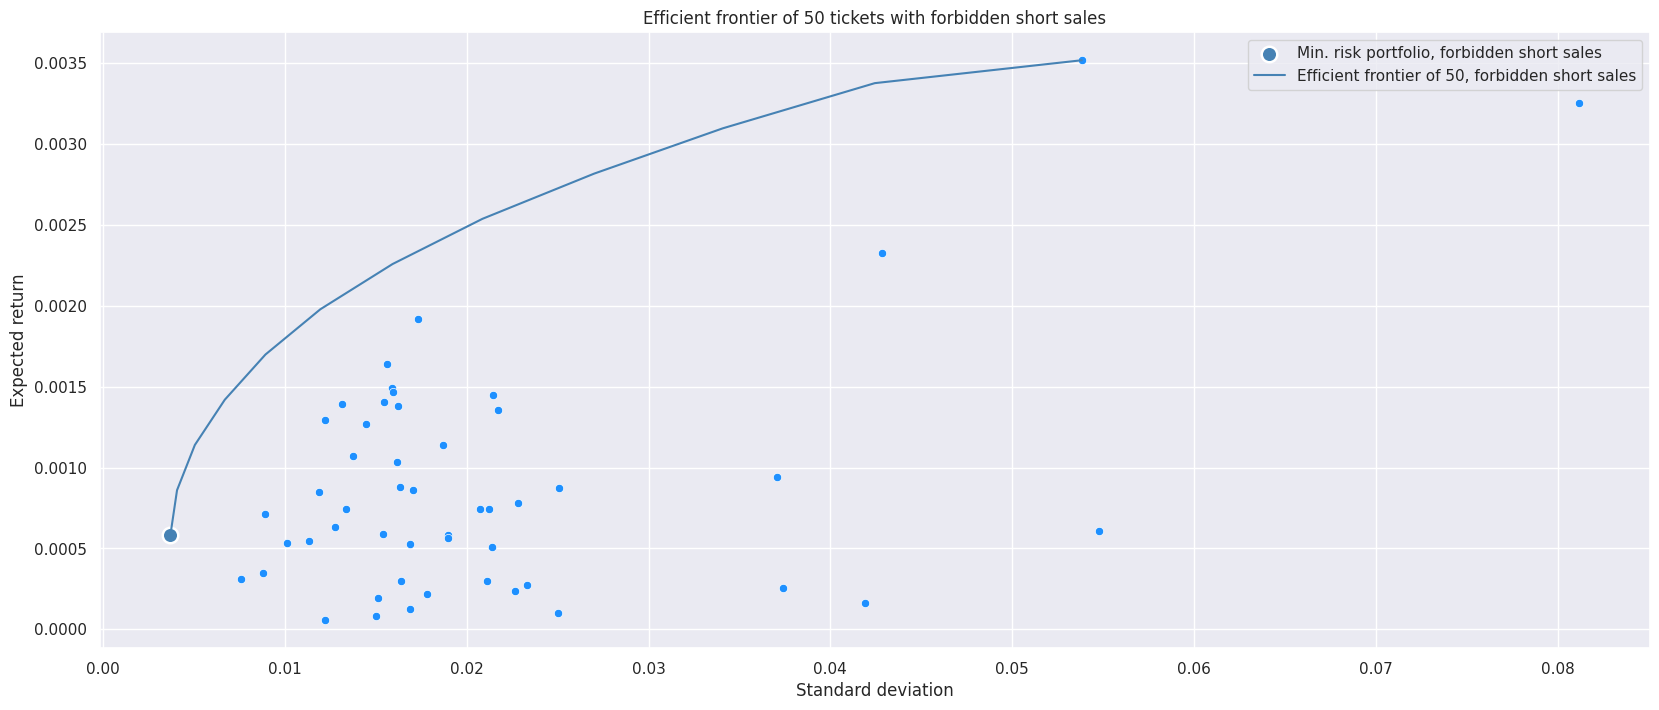

In [52]:
plt.figure(figsize=(20,8))
plot_efficient_frontier(top_50_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_with_short_50, 
                        min_risk_portfolio_return_with_short_50, 
                        portfolio_stds_with_short_50, 
                        portfolio_returns_with_short_50, 
                        short_sales=False, 
                        color='steelblue', 
                        num=50)
plt.title('Efficient frontier of 50 tickets with forbidden short sales')
plt.show()

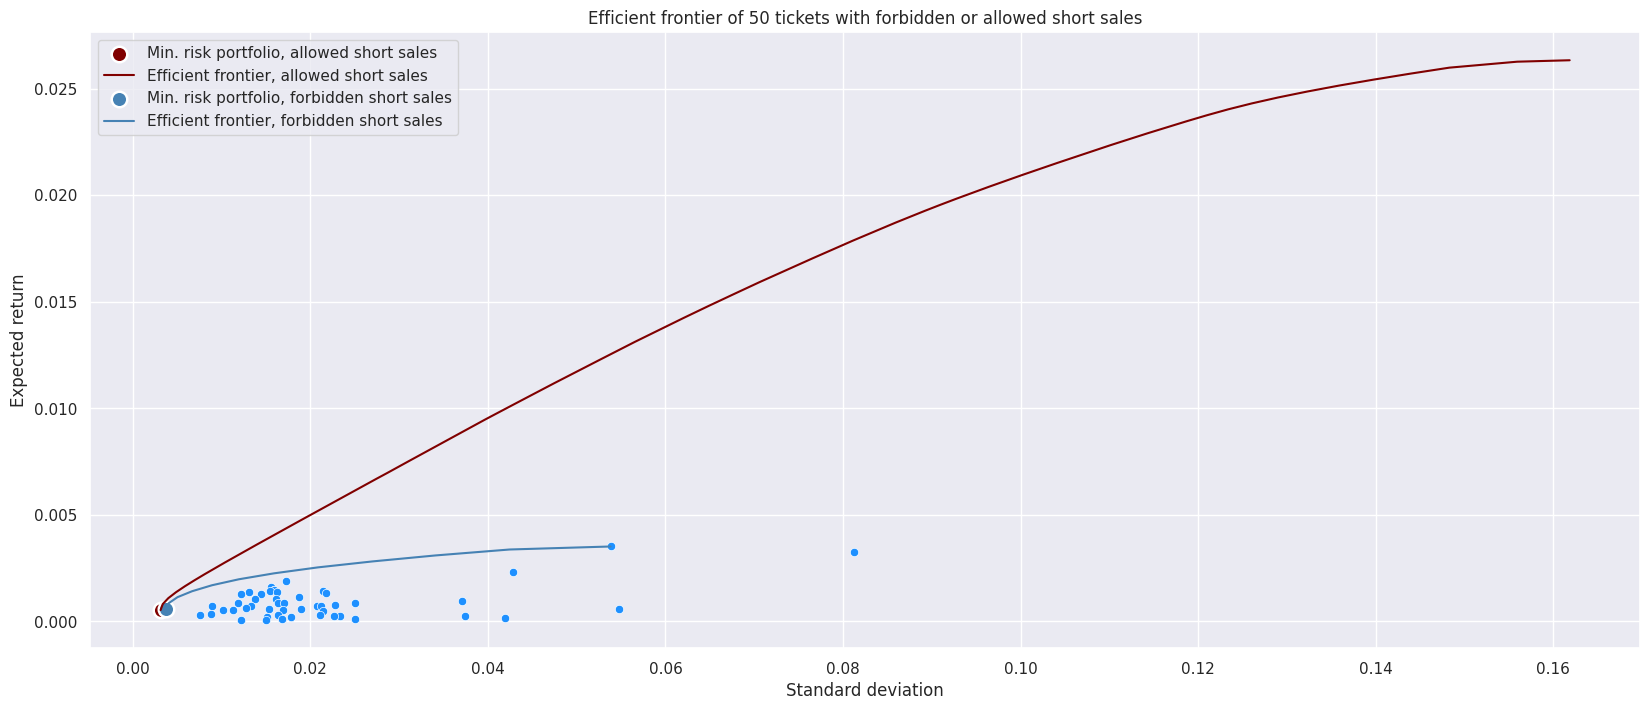

In [21]:
plt.figure(figsize=(20,8))

plot_efficient_frontier(top_50_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_50,
                        min_risk_portfolio_return_50, 
                        portfolio_stds_50, 
                        portfolio_returns_50, 
                        short_sales=True, 
                        color='maroon')

plot_efficient_frontier(top_50_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_with_short_50, 
                        min_risk_portfolio_return_with_short_50, 
                        portfolio_stds_with_short_50, 
                        portfolio_returns_with_short_50, 
                        short_sales=False, 
                        color='steelblue')

plt.title('Efficient frontier of 50 tickets with forbidden or allowed short sales')
plt.show()

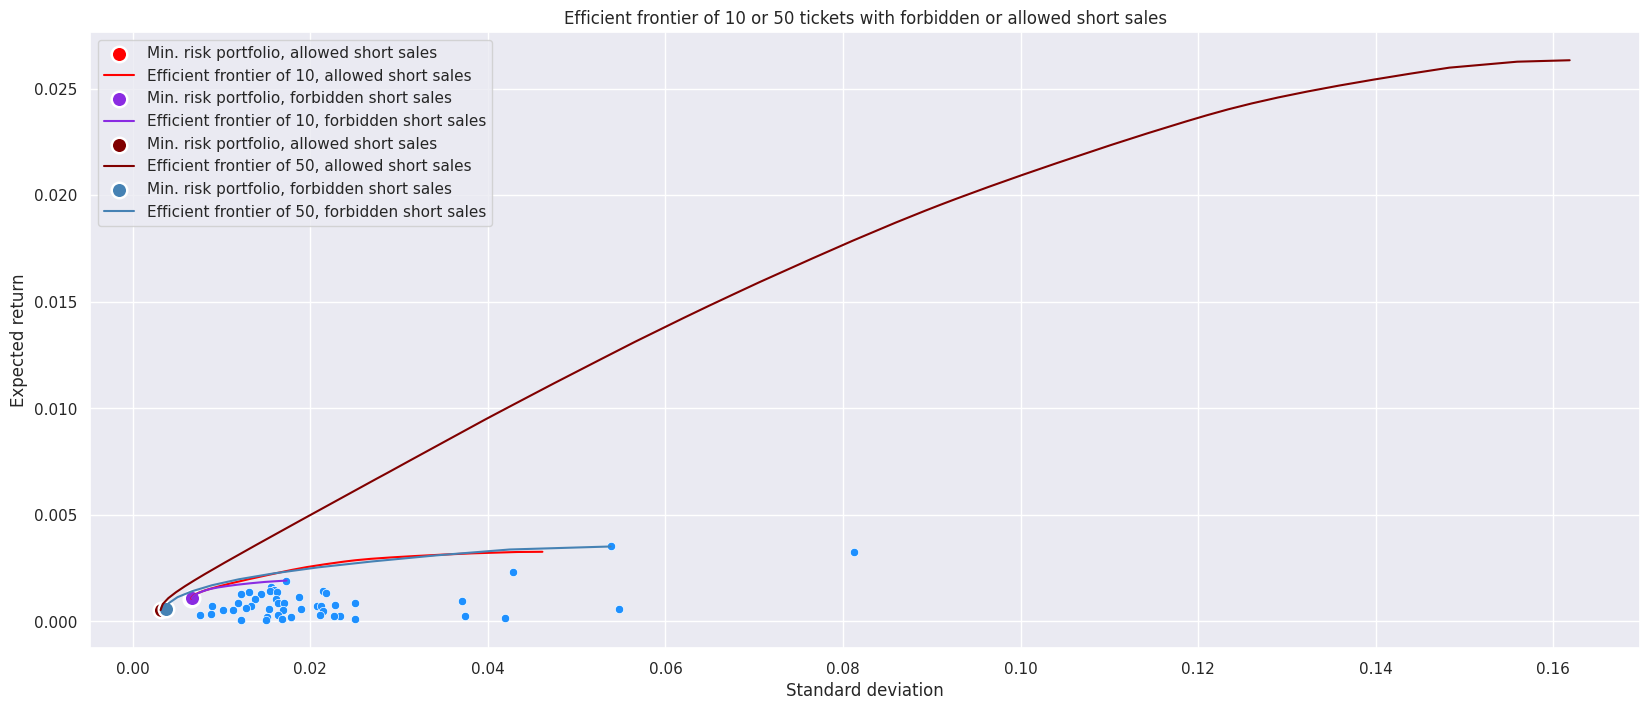

In [53]:
plt.figure(figsize=(20,8))

plot_efficient_frontier(top_10_by_risk_fee_characteristics, 
                        min_risk_portfolio_std,
                        min_risk_portfolio_return, 
                        portfolio_stds, 
                        portfolio_returns, 
                        short_sales=True )

plot_efficient_frontier(top_10_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_with_short, 
                        min_risk_portfolio_return_with_short, 
                        portfolio_stds_with_short, 
                        portfolio_returns_with_short, 
                        short_sales=False, 
                        color='blueviolet')

plot_efficient_frontier(top_50_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_50, 
                        min_risk_portfolio_return_50, 
                        portfolio_stds_50, 
                        portfolio_returns_50, 
                        short_sales=True, 
                        color='maroon', 
                        num=50)

plot_efficient_frontier(top_50_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_with_short_50, 
                        min_risk_portfolio_return_with_short_50, 
                        portfolio_stds_with_short_50, 
                        portfolio_returns_with_short_50, 
                        short_sales=False, 
                        color='steelblue', 
                        num=50)

plt.title('Efficient frontier of 10 or 50 tickets with forbidden or allowed short sales')
plt.show()

Построим на одном графике все четыре эффективных фронта. Линия на 50 активах значительно более резкая по сравнению с остальными, с возрастанием риска доход растет сильнее, чем в других случаях.


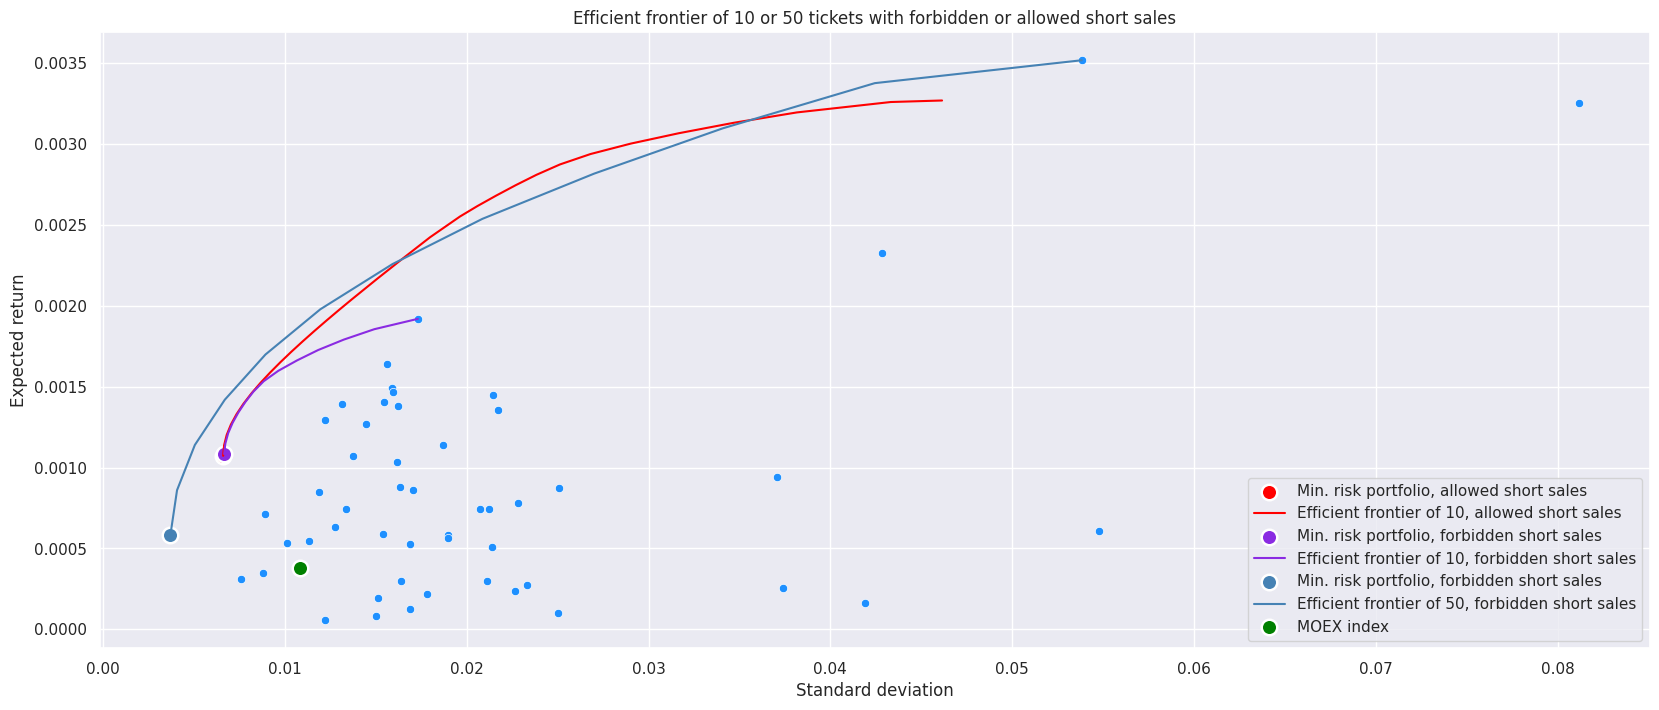

In [83]:
plt.figure(figsize=(20,8))

plot_efficient_frontier(top_10_by_risk_fee_characteristics, min_risk_portfolio_std, 
                        min_risk_portfolio_return, portfolio_stds, portfolio_returns, short_sales=True )

plot_efficient_frontier(top_10_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_with_short, min_risk_portfolio_return_with_short, 
                        portfolio_stds_with_short, portfolio_returns_with_short, short_sales=False, color='blueviolet')

plot_efficient_frontier(top_50_by_risk_fee_characteristics, 
                        min_risk_portfolio_std_with_short_50, min_risk_portfolio_return_with_short_50, 
                        portfolio_stds_with_short_50, portfolio_returns_with_short_50, short_sales=False, color='steelblue', num=50)

sns.scatterplot(x=[index_std_return], y=[index_mean_return], marker='.', s=500, label=f'MOEX index', color='green')

plt.title('Efficient frontier of 10 or 50 tickets with forbidden or allowed short sales')
plt.show()

Посмотрим поближе на остальные фронты, сравним с индексом. Видно, что даже портфели с минимальным риском имеют более высокую доходность,чем индекс. В целом, эффективные фронты на 10 активах отлично себя показывают: эффективный фронт с запрещенными короткими продажами частично совпадет с фронтом с разрешенными. К тому же, фронт с разрешенными короткими продажами даже пересекает и частично превосходит фронт без коротких продаж на 50 активах,
то есть фронты на 10 занимают максимально выгодную позицию из возможных. Несмотря на это, фронты на 50 также занимают достаточно выгодные позиции, особенно с разрешенными короткими продажами. Поэтому можно сделать вывод, что способ выбора активов в портфель с помощью платы за риск, стоит внимания.